https://www.youtube.com/watch?v=V9fEwzshzhA&feature=emb_title

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [13]:
data = pd.read_csv("data.csv", header=None)

In [14]:
data

,0,1,2
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1
...,...,...,...
95,0.77029,0.701400,0
96,0.73156,0.717820,0
97,0.44556,0.579910,0
98,0.85275,0.859870,0


In [15]:
X = np.array(data[[0,1]])

In [16]:
y = np.array(data[2])

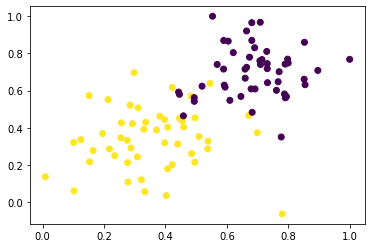

In [17]:
plt.scatter(X[:,0], X[:,1], c=y)

In [18]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [19]:
#Wx + b

In [20]:
# Probability and score
def output_formula(features, weights, bias):
    return sigmoid(np.dot(features,weights)+bias)

In [21]:
# Cross entropy formula
def error_formula(y, output):
    return -y*np.log(output) - (1-y)*np.log(1-output)

Loss Function: is the general name for the error functions.
In this binary classification problem, and many others, we use Cross Entropy as Loss function. 

In general, a loss is something that you want to minimize.

In [22]:
def update_weights(x, y, weights, bias, learning_rate):
    output = output_formula(x, weights, bias)
    d_error = y - output
    weights = weights + learning_rate*d_error*x
    bias = bias + learning_rate*d_error
    return weights, bias

In [23]:
X.shape


(100, 2)

In [24]:
weights = np.random.normal(size=X.shape[1])
bias = 0
out = output_formula(X, weights, bias)
loss = error_formula(y, out)

In [25]:
np.mean(out > 0.5)

0.05

In [26]:
out

array([0.67553553, 0.41868713, 0.4948902 , 0.36070851, 0.43273713,
       0.50315966, 0.39757506, 0.43812904, 0.36497894, 0.42775808,
       0.43708706, 0.3679151 , 0.35227545, 0.39932317, 0.37562766,
       0.48719763, 0.49529405, 0.4452144 , 0.3697683 , 0.38059729,
       0.39033466, 0.32736734, 0.38383893, 0.37045526, 0.45990042,
       0.25154318, 0.27457607, 0.40160206, 0.5385567 , 0.46934875,
       0.36632327, 0.5619711 , 0.29284094, 0.33108924, 0.3875154 ,
       0.4075773 , 0.41134544, 0.35909391, 0.45000835, 0.47123774,
       0.39014521, 0.31279043, 0.50599185, 0.3013221 , 0.49128669,
       0.42740602, 0.38352959, 0.3169842 , 0.45328101, 0.42687902,
       0.18742772, 0.3147328 , 0.35694296, 0.23646949, 0.40545677,
       0.33723006, 0.27519085, 0.27815394, 0.38036568, 0.28964036,
       0.34448014, 0.31184042, 0.34857233, 0.29787588, 0.3877854 ,
       0.29111198, 0.32967198, 0.335929  , 0.48595985, 0.30232255,
       0.21698181, 0.35108229, 0.22631068, 0.32089059, 0.36032

In [27]:
np.mean((out > 0.5) == y)

0.55

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
import time
np.random.seed(42)

epochs = 1000
learning_rate = 0.01

def train(train_features, train_targets, test_features, test_targets, epochs, learning_rate):
    weights = np.random.normal(size=train_features.shape[1])
    bias = 0
    errors = []
    test_errors = []
    for epoch in range(epochs):
        for x, y in zip(train_features, train_targets):
            output = output_formula(x, weights, bias)
            weights, bias = update_weights(x, y, weights, bias, learning_rate)
        # at the end of one epoch
        out = output_formula(train_features, weights, bias)
        loss = np.mean(error_formula(train_targets, out))
        errors.append(loss)
        out_test = output_formula(test_features, weights, bias)
        loss_test = np.mean(error_formula(test_targets, out_test))
        test_errors.append(loss_test)
        
        if epoch % 10 == 0:
            print("Epoch:", epoch)
            print("Train loss", loss)
            predictions = out > 0.5
            accuracy = np.mean(predictions == train_targets)
            print("Train Accuracy", accuracy)
            print("Test loss", loss_test)
            predictions = out_test > 0.5
            accuracy = np.mean(predictions == test_targets)
            print("Test Accuracy", accuracy)
        plt.plot(errors)
        plt.plot(test_errors)
        
        
        
        
        

Epoch: 0
Train loss 0.7117483654726598
Train Accuracy 0.3
Test loss 0.7023157933365239
Test Accuracy 0.3333333333333333
Epoch: 10
Train loss 0.6445552413143899
Train Accuracy 0.5428571428571428
Test loss 0.6430783262870947
Test Accuracy 0.5333333333333333
Epoch: 20
Train loss 0.6026193327619113
Train Accuracy 0.6571428571428571
Test loss 0.5857879311488109
Test Accuracy 0.7
Epoch: 30
Train loss 0.5661689745803781
Train Accuracy 0.7285714285714285
Test loss 0.5355808924857777
Test Accuracy 0.7666666666666667
Epoch: 40
Train loss 0.5344890307069268
Train Accuracy 0.8
Test loss 0.4926844780546055
Test Accuracy 0.8333333333333334
Epoch: 50
Train loss 0.5068603906363077
Train Accuracy 0.8571428571428571
Test loss 0.455948311998732
Test Accuracy 0.9
Epoch: 60
Train loss 0.48265857397336703
Train Accuracy 0.9
Test loss 0.4243171330894691
Test Accuracy 0.9333333333333333
Epoch: 70
Train loss 0.46135690060216106
Train Accuracy 0.9285714285714286
Test loss 0.39691477758871613
Test Accuracy 0.933

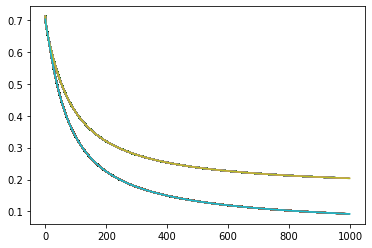

In [30]:
train(X_train, y_train, X_test, y_test, epochs, learning_rate)

In [31]:
w1x1+w2x2

NameError: name 'w1x1' is not defined